### Import libraries

In [54]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FactorAnalysis
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import xgboost as xgb
from sklearn.metrics import log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [55]:
df = pd.read_csv("qsar_oral_toxicity.csv", delimiter = ";", header = None)
df

0       0
1       0
2       0
3       0
4       0
       ..
1020    0
1021    0
1022    0
1023    0
1024    0
Length: 1025, dtype: int64

##CLASS IMBALANCE DETECTION

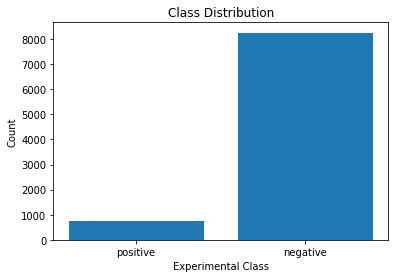

In [40]:
positives = sum(df[1024]=='positive')
negatives = sum(df[1024]=='negative')

# plot bar plot
plt.bar(['positive', 'negative'], [positives, negatives])
plt.xlabel('Experimental Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


##LABEL ENCODING FOR TARGET CLASS

In [41]:
# create an instance of LabelEncoder
le = LabelEncoder()

# fit and transform the column of categorical data
df[1024] = le.fit_transform(df[1024])


df[1024]

0       0
1       0
2       0
3       0
4       0
       ..
8987    0
8988    0
8989    0
8990    0
8991    0
Name: 1024, Length: 8992, dtype: int64

##SCATTER PLOT

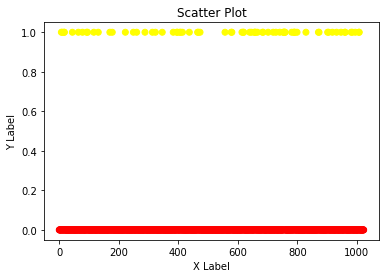

In [42]:
x1= [i for i in range(1024)] # x-coordinates
y1 = [df[i][1024] for i in range(1024)] # y-coordinates

colors = []
for j in y1:
  if j == 0:
    colors.append('red')
  else:
    colors.append('yellow')

plt.scatter(x1, y1,c=colors)
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.title('Scatter Plot')
plt.show()


### Defining X as Features and Y as Target

In [43]:
from sklearn.model_selection import train_test_split

# feature and target variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

print(X.dtypes)



0       int64
1       int64
2       int64
3       int64
4       int64
        ...  
1019    int64
1020    int64
1021    int64
1022    int64
1023    int64
Length: 1024, dtype: object


###LOGISTIC PCA USING FACTOR ANALYSIS

In [44]:
# create a FactorAnalysis object with the number of components you want to extract
n_components = 400
fa = FactorAnalysis(n_components=n_components, rotation="varimax")

# fit the model to your binary data
fa.fit(X)

# transform your data using the fitted model
X_transformed = fa.transform(X)
X=X_transformed

print(X.shape)

(8992, 400)


In [45]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


SMOTE AND ADASYN for imbalanced dataset

In [46]:
# apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train1, y_train1 = smote.fit_resample(X_train, y_train)

# apply ADASYN to the training data only
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

##KNN algorithm for SMOTE

Accuracy: 77.71%
              precision    recall  f1-score   support

           0       0.98      0.77      0.86      1650
           1       0.25      0.84      0.38       149

    accuracy                           0.78      1799
   macro avg       0.62      0.81      0.62      1799
weighted avg       0.92      0.78      0.82      1799

Cross-entropy Loss: 8.0341884430439


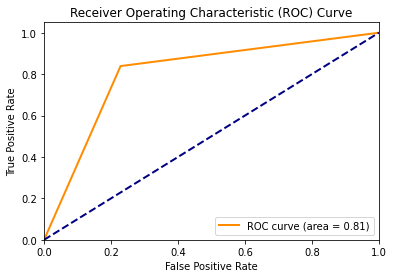

In [47]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train1, y_train1)

knn_pred = knn.predict(X_test)

#calculate the accuracy score for SMOTE
acc = accuracy_score(y_test, knn_pred)
print("Accuracy: {:.2f}%".format(acc * 100))

print(classification_report(y_test, knn_pred))
loss = log_loss(y_test, knn_pred)
print("Cross-entropy Loss:", loss)

# calculate false positive rate (fpr), true positive rate (tpr), and threshold values
fpr, tpr, thresholds = roc_curve(y_test, knn_pred)

# calculate area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()




##KNN algorithm for ADASYN

Accuracy: 75.99%
              precision    recall  f1-score   support

           0       0.98      0.75      0.85      1650
           1       0.24      0.85      0.37       149

    accuracy                           0.76      1799
   macro avg       0.61      0.80      0.61      1799
weighted avg       0.92      0.76      0.81      1799

Cross-entropy Loss: 8.655285305224352


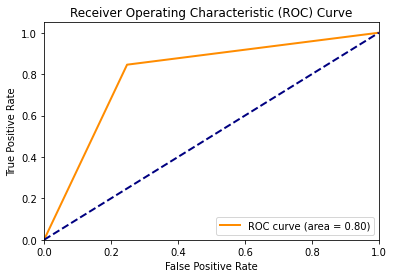

In [48]:
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train_resampled, y_train_resampled)
knn_pred1 = knn1.predict(X_test)
#calculate the accuracy score for ADASYN
acc = accuracy_score(y_test, knn_pred1)
print("Accuracy: {:.2f}%".format(acc * 100))

print(classification_report(y_test, knn_pred1))
loss = log_loss(y_test, knn_pred1)
print("Cross-entropy Loss:", loss)


# calculate false positive rate (fpr), true positive rate (tpr), and threshold values
fpr, tpr, thresholds = roc_curve(y_test, knn_pred1)

# calculate area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()





##XGB Classifier for SMOTE

Accuracy: 93.55%
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1650
           1       0.64      0.50      0.56       149

    accuracy                           0.94      1799
   macro avg       0.80      0.74      0.76      1799
weighted avg       0.93      0.94      0.93      1799



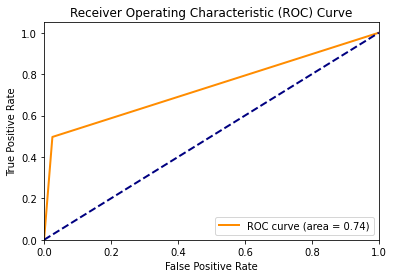

Cross-entropy Loss: 2.3241043875139464


In [49]:
xgb_model = xgb.XGBClassifier(max_depth=3, n_estimators=500, learning_rate=0.1)

xgb_model.fit(X_train1, y_train1)
xgb_pred = xgb_model.predict(X_test)



#calculate the accuracy score for SMOTE
acc = accuracy_score(y_test, xgb_pred)
print("Accuracy: {:.2f}%".format(acc * 100))

print(classification_report(y_test, xgb_pred))

# calculate false positive rate (fpr), true positive rate (tpr), and threshold values
fpr, tpr, thresholds = roc_curve(y_test, xgb_pred)

# calculate area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

loss = log_loss(y_test, xgb_pred)
print("Cross-entropy Loss:", loss)


##XGB Classifier for ADASYN 

Accuracy: 92.83%
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1650
           1       0.58      0.48      0.53       149

    accuracy                           0.93      1799
   macro avg       0.77      0.73      0.74      1799
weighted avg       0.92      0.93      0.93      1799

Cross-entropy Loss: 2.5845643619767165


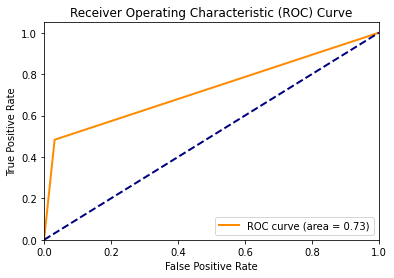

In [50]:
xgb_model1 = xgb.XGBClassifier(max_depth=3, n_estimators=500, learning_rate=0.1)

xgb_model1.fit(X_train_resampled, y_train_resampled)
xgb_pred1 = xgb_model1.predict(X_test)
#calculate the accuracy score for ADASYN
acc = accuracy_score(y_test, xgb_pred1)
print("Accuracy: {:.2f}%".format(acc * 100))

print(classification_report(y_test, xgb_pred1))

loss = log_loss(y_test, xgb_pred1)
print("Cross-entropy Loss:", loss)


# calculate false positive rate (fpr), true positive rate (tpr), and threshold values
fpr, tpr, thresholds = roc_curve(y_test, xgb_pred1)

# calculate area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [51]:
# from sklearn.model_selection import cross_val_score

# # Define the random forest model with a fixed max_depth
# max_depth = 5
# rf_model = RandomForestClassifier(max_depth=max_depth)

# # Define the range of n_estimators values to test
# n_estimators_range = [50, 100, 150, 200, 250, 300]

# # Perform cross-validation for each n_estimators value
# cv_scores = []
# for n_estimators in n_estimators_range:
#     rf_model.set_params(n_estimators=n_estimators)
#     scores = cross_val_score(rf_model, X_train1, y_train1, cv=5)
#     cv_scores.append(scores.mean())

# # Find the n_estimators value with the highest cross-validation score
# optimum_n_estimators = n_estimators_range[cv_scores.index(max(cv_scores))]

# print(f"The optimum number of n_estimators is {optimum_n_estimators}")

##Random Forest Classifier for SMOTE



Accuracy: 85.83%
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1650
           1       0.31      0.57      0.40       149

    accuracy                           0.86      1799
   macro avg       0.63      0.73      0.66      1799
weighted avg       0.90      0.86      0.88      1799

Cross-entropy Loss: 5.109022576000486


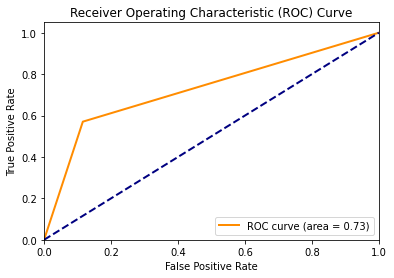

In [52]:
# create a RandomForestClassifier object with desired hyperparameters
rf_model = RandomForestClassifier(n_estimators=500, max_depth=5)
# fit the model to the training data
rf_model.fit(X_train1, y_train1)

rf_pred = rf_model.predict(X_test)

acc2 = accuracy_score(y_test, rf_pred)
print("Accuracy: {:.2f}%".format(acc2 * 100))

print(classification_report(y_test, rf_pred))

loss = log_loss(y_test, rf_pred)
print("Cross-entropy Loss:", loss)

# calculate false positive rate (fpr), true positive rate (tpr), and threshold values
fpr, tpr, thresholds = roc_curve(y_test, rf_pred)

# calculate area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Accuracy: 83.82%
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      1650
           1       0.28      0.60      0.38       149

    accuracy                           0.84      1799
   macro avg       0.62      0.73      0.64      1799
weighted avg       0.90      0.84      0.86      1799

Cross-entropy Loss: 5.830296351435849


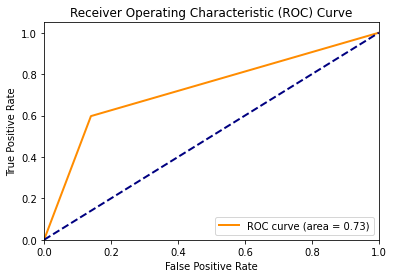

Cross-entropy Loss: 5.830296351435849


In [53]:
rf_model1 = RandomForestClassifier(n_estimators=300, max_depth=5)
rf_model1.fit(X_train_resampled, y_train_resampled)

# make predictions on the test data
rf_pred1 = rf_model1.predict(X_test)

#calculate the accuracy score
acc2 = accuracy_score(y_test, rf_pred1)
print("Accuracy: {:.2f}%".format(acc2 * 100))

print(classification_report(y_test, rf_pred1))

loss = log_loss(y_test, rf_pred1)
print("Cross-entropy Loss:", loss)

# calculate false positive rate (fpr), true positive rate (tpr), and threshold values
fpr, tpr, thresholds = roc_curve(y_test, rf_pred1)

# calculate area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("Cross-entropy Loss:", loss)

